# Predicting Head Injury Severity in a Car Crash using Multiple Regression

# Business Understanding


## Determine Business Objective

### Background 

A crash test is a form of destructive testing usually performed in order to ensure safe design standards in crashworthiness and crash compatibility for various modes of transportation (automobiles) or related systems and components.

### Business Objective

* Build the best multiple regression model that can predict head injury severity, using all the other variables as the predictors. 
* Determine which variables must be made into indicator variables. 
* Determine which variables might be superfluous. 
* Build two parallel models, one where you account for multicollinearity, and another where you don't consider multicollinearity. For which purpose may each of these models be used?  
* Continuing with the Crash data set, combine the four injury measurement variables into a single variable, defending your choice of combination function. 
 - Build the best multiple regression model for the purpose of predicting injury severity, using all the variables as the predictors. 
 - Build two parallel models, one where you account for multicollinearity, and another where you don't consider multicollinearity. For which purpose may each of these models be used?  

### Success Criteria

Predict Injury Severity

## Asses the situation

### Resource Inventory

Crash.dat file that has data of car crash test.


### Risk and Contigency



### Terminology



## Determining Data Mining Objective

### DM success criteria


## Produce Project Plan


### initial assesment of tools and techniques



# Data Understanding

### Collect initial data
* Data collected from online colaborative repository of Car Assessment Program
* A sample data is recorded in a file - Crash.dat

### Describe data

* MAKE - It tells the company of the car.
* MODEL - It tells the model of the car.
* CARID - It is the unique name by which we can know the company and the model of the company. It uniquely identifies a certain type of car from another.
* CARID_YR - It also contains the CARID, but along with it also tells the year in which it was released.
* HEAD_INJ - Number of head injuries in an accident in a certain type of car.
* CHEST_IN - Number of chest injuries in an accident in a certain type of car.
* LLEG_INJ - Number of injuries in left leg in an accident in a certain type of car.
* RLEG_INJ - Number of injuries in right leg in an accident in a certain type of car.
* DRIV_PAS - Whether the passenger got hurt or the driver.
* PROTECT - What type of protection was available in the vehicle.
* DOORS - Number of doors in the vehicle.
* YEAR - In what year the car was launched.
* WEIGHT -  Tells the weight of the car.
* SIZE -  Categorize the cars by their size.
* SIZE2 -  Size in numeric value for the category of size to which the car belongs.
* PROTECT2 - Numeric value for the protection in the car.


### Explore data

In [94]:
# get the libraries for analysis and model building
import pandas as pd
import numpy as np
import statsmodels.api as sm;
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# load the dataset as DataFrame
df = pd.read_csv('Crash.dat',sep='\t') 

# View the first 5 rows of the dataset
df.head()

,MAKE,MODEL,CARID,CARID_YR,HEAD_INJ,CHEST_IN,LLEG_INJ,RLEG_INJ,DRIV_PAS,PROTECT,DOORS,YEAR,WEIGHT,SIZE,SIZE2,PROTECT2
0,Acura,Integra,Acura Integra,Acura Integra 87,599,35,791,262,Driver,manual belts,2,87,2350,lt,2,1
1,Acura,Integra RS,Acura Integra RS,Acura Integra RS 90,585,,1545,1301,Driver,Motorized belts,4,90,2490,lt,2,2
2,Acura,Legend LS,Acura Legend LS,Acura Legend LS 88,435,50,926,708,Driver,d airbag,4,88,3280,med,3,4
3,Audi,80,Audi 80,Audi 80 89,600,49,168,1871,Driver,manual belts,4,89,2790,comp,1,1
4,Audi,100,Audi 100,Audi 100 89,185,35,998,894,Driver,d airbag,4,89,3100,med,3,4


In [95]:
# dataset size , i.e., number of rows x columns
df.shape

(352, 16)

In [96]:
# display the name of the columns in the dataset
df.columns

Index(['MAKE', 'MODEL', 'CARID', 'CARID_YR', 'HEAD_INJ', 'CHEST_IN',
       'LLEG_INJ', 'RLEG_INJ', 'DRIV_PAS', 'PROTECT', 'DOORS', 'YEAR',
       'WEIGHT', 'SIZE', 'SIZE2', 'PROTECT2'],
      dtype='object')

In [97]:
# Total number of unique values under each column
df.nunique()

MAKE         37
MODEL       143
CARID       145
CARID_YR    174
HEAD_INJ    305
CHEST_IN     47
LLEG_INJ    319
RLEG_INJ    304
DRIV_PAS      2
PROTECT       5
DOORS         3
YEAR          5
WEIGHT      148
SIZE          8
SIZE2         8
PROTECT2      5
dtype: int64

In [98]:
# short summary of the dataset, i.e.,
# col_name    data_count    value_type    data_type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 16 columns):
MAKE        352 non-null object
MODEL       352 non-null object
CARID       352 non-null object
CARID_YR    352 non-null object
HEAD_INJ    352 non-null object
CHEST_IN    352 non-null object
LLEG_INJ    352 non-null object
RLEG_INJ    352 non-null object
DRIV_PAS    352 non-null object
PROTECT     352 non-null object
DOORS       352 non-null object
YEAR        352 non-null int64
WEIGHT      352 non-null int64
SIZE        352 non-null object
SIZE2       352 non-null int64
PROTECT2    352 non-null object
dtypes: int64(3), object(13)
memory usage: 44.1+ KB


In [99]:
df.describe()

,YEAR,WEIGHT,SIZE2
count,352.000000,352.000000,352.000000
mean,88.914773,2930.340909,3.573864
std,1.411636,627.134938,2.428510
min,87.000000,1590.000000,1.000000
25%,88.000000,2487.500000,2.000000
50%,89.000000,2855.000000,3.000000
75%,90.000000,3292.000000,6.000000
max,91.000000,5619.000000,8.000000



### Verify data quality


In [100]:
# Total count of duplicate rows in the dataset
df.duplicated().sum()

0

In [101]:
# Count of null values in the dataset
df.isnull().sum()

MAKE        0
MODEL       0
CARID       0
CARID_YR    0
HEAD_INJ    0
CHEST_IN    0
LLEG_INJ    0
RLEG_INJ    0
DRIV_PAS    0
PROTECT     0
DOORS       0
YEAR        0
WEIGHT      0
SIZE        0
SIZE2       0
PROTECT2    0
dtype: int64

In [102]:
df.dtypes

MAKE        object
MODEL       object
CARID       object
CARID_YR    object
HEAD_INJ    object
CHEST_IN    object
LLEG_INJ    object
RLEG_INJ    object
DRIV_PAS    object
PROTECT     object
DOORS       object
YEAR         int64
WEIGHT       int64
SIZE        object
SIZE2        int64
PROTECT2    object
dtype: object

# Data prepration

### Rotational data selection for inclusion and exclusion

fields to be included, no. of rows needed to be selected


### Data Cleaning report

no. of incorrect values, no. of missing fields, no. of blank fields (data cleaning reports)


In [103]:
# Fill in empty spaces with NaN values by extracting values from strings
# Columns = HEAD_INJ, CHEST_INJ,LLEG_INJ, RLEG_INJ, DOORS, PROTECT2
df['HEAD_INJ'] = df['HEAD_INJ'].str.extract('(\d+)')
df['CHEST_IN'] = df['CHEST_IN'].str.extract('(\d+)')
df['LLEG_INJ'] = df['LLEG_INJ'].str.extract('(\d+)')
df['RLEG_INJ'] = df['RLEG_INJ'].str.extract('(\d+)')
df['DOORS']    = df['DOORS'].str.extract('(\d+)')
df['PROTECT2'] = df['PROTECT2'].str.extract('(\d+)')

df.head()

,MAKE,MODEL,CARID,CARID_YR,HEAD_INJ,CHEST_IN,LLEG_INJ,RLEG_INJ,DRIV_PAS,PROTECT,DOORS,YEAR,WEIGHT,SIZE,SIZE2,PROTECT2
0,Acura,Integra,Acura Integra,Acura Integra 87,599,35,791,262,Driver,manual belts,2,87,2350,lt,2,1
1,Acura,Integra RS,Acura Integra RS,Acura Integra RS 90,585,NaN,1545,1301,Driver,Motorized belts,4,90,2490,lt,2,2
2,Acura,Legend LS,Acura Legend LS,Acura Legend LS 88,435,50,926,708,Driver,d airbag,4,88,3280,med,3,4
3,Audi,80,Audi 80,Audi 80 89,600,49,168,1871,Driver,manual belts,4,89,2790,comp,1,1
4,Audi,100,Audi 100,Audi 100 89,185,35,998,894,Driver,d airbag,4,89,3100,med,3,4


In [104]:
# Count of null values in the dataset (After conversion from empty string to NaN)
df.isnull().sum()

MAKE         0
MODEL        0
CARID        0
CARID_YR     0
HEAD_INJ    14
CHEST_IN    11
LLEG_INJ     9
RLEG_INJ    11
DRIV_PAS     0
PROTECT      0
DOORS       66
YEAR         0
WEIGHT       0
SIZE         0
SIZE2        0
PROTECT2     4
dtype: int64

In [105]:
# Dropping all rows with null values in HEAD_INJ column
df.dropna(subset=['HEAD_INJ'],inplace=True)

In [106]:
# Convert object(string) type columns into integer type
df['HEAD_INJ'] = df['HEAD_INJ'].astype('int64')

In [107]:
# fill NaN in other columns with average value of respective columns
# 'CHEST_IN','LLEG_INJ','RLEG_INJ','DOORS','PROTECT2'

val = df['CHEST_IN'].dropna() # drop NaN value in the column
val = pd.to_numeric(val)       # convert the col values to numeric
mean_val = round(val.mean())       # get rounded mean of the column
df['CHEST_IN'].fillna(mean_val,inplace=True) # fillin the Mean Value in NaN of actual column

# applying smae steps for other columns

val = df['LLEG_INJ'].dropna() 
val = pd.to_numeric(val)      
mean_val = round(val.mean())  
df['LLEG_INJ'].fillna(mean_val,inplace=True)

val = df['RLEG_INJ'].dropna() 
val = pd.to_numeric(val)    
mean_val = round(val.mean())       
df['RLEG_INJ'].fillna(mean_val,inplace=True) 

val = df['DOORS'].dropna() 
val = pd.to_numeric(val)       
mean_val = round(val.mean())   
df['DOORS'].fillna(mean_val,inplace=True) 

val = df['PROTECT2'].dropna() 
val = pd.to_numeric(val)      
mean_val = round(val.mean())  
df['PROTECT2'].fillna(mean_val,inplace=True) 

df[['CHEST_IN','LLEG_INJ','RLEG_INJ','DOORS','PROTECT2']].isnull().sum()

CHEST_IN    0
LLEG_INJ    0
RLEG_INJ    0
DOORS       0
PROTECT2    0
dtype: int64

In [108]:
# Convert object(string) type columns into integer type
df[['HEAD_INJ','CHEST_IN','LLEG_INJ','RLEG_INJ','DOORS','PROTECT2']] = df[['HEAD_INJ','CHEST_IN','LLEG_INJ',
                                                                           'RLEG_INJ','DOORS','PROTECT2']].astype('int64')
df.dtypes

MAKE        object
MODEL       object
CARID       object
CARID_YR    object
HEAD_INJ     int64
CHEST_IN     int64
LLEG_INJ     int64
RLEG_INJ     int64
DRIV_PAS    object
PROTECT     object
DOORS        int64
YEAR         int64
WEIGHT       int64
SIZE        object
SIZE2        int64
PROTECT2     int64
dtype: object

In [109]:
df.describe()

,HEAD_INJ,CHEST_IN,LLEG_INJ,RLEG_INJ,DOORS,YEAR,WEIGHT,SIZE2,PROTECT2
count,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000
mean,900.568047,48.523669,1058.073964,740.180473,3.130178,88.881657,2902.917160,3.553254,1.896450
std,465.049823,9.556689,542.827741,424.225893,0.888890,1.398671,592.878968,2.416279,1.159883
min,157.000000,31.000000,120.000000,89.000000,2.000000,87.000000,1590.000000,1.000000,1.000000
25%,583.000000,42.000000,691.750000,450.000000,2.000000,88.000000,2465.000000,2.000000,1.000000
50%,790.500000,47.000000,1012.500000,656.500000,3.000000,89.000000,2845.000000,3.000000,1.000000
75%,1069.500000,54.000000,1365.500000,943.500000,4.000000,90.000000,3284.000000,6.000000,3.000000
max,3665.000000,97.000000,3347.000000,2856.000000,4.000000,91.000000,5103.000000,8.000000,4.000000


### Construct data 

Derived fields



### Format  and cimbine data

integrate the data


In [110]:
df['intercept'] = 1
lm = sm.OLS(df['HEAD_INJ'],df[['intercept','CHEST_IN','LLEG_INJ','RLEG_INJ','DOORS','YEAR','WEIGHT','SIZE2','PROTECT2']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               HEAD_INJ   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     26.28
Date:                Sat, 13 Oct 2018   Prob (F-statistic):           2.35e-31
Time:                        09:34:21   Log-Likelihood:                -2471.6
No. Observations:                 338   AIC:                             4961.
Df Residuals:                     329   BIC:                             4996.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1889.2188   1372.098      1.377      0.169    -809.973    4588.411
CHEST_IN      25.2415      2.304     10.955      0.000      20.709      29.774
LLEG_INJ      -0.0203      0.039     -0.518      0.605      -0.097       0.057
RLEG_INJ      -0.0194      0.050     -0.390      0.697      -0.117       0.078
DOORS        -16.5654     24.189     -0.685      0.494     -64.149      31.019
YEAR         -24.9043     15.856     -1.571      0.117     -56.095       6.287
WEIGHT         0.0682      0.042      1.630      0.104      -0.014       0.150
SIZE2          8.0180     11.164      0.718      0.473     -13.943      29.979
PROTECT2     -73.1042     21.115     -3.462      0.001    -114.641     -31.567
==============================================================================
Omnibus:                       88.562   Durbin-Watson:                   1.770
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              229.007
Skew:                           1.240   Prob(JB):                     1.87e-50
Kurtosis:                       6.180   Cond. No.                     2.22e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.22e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

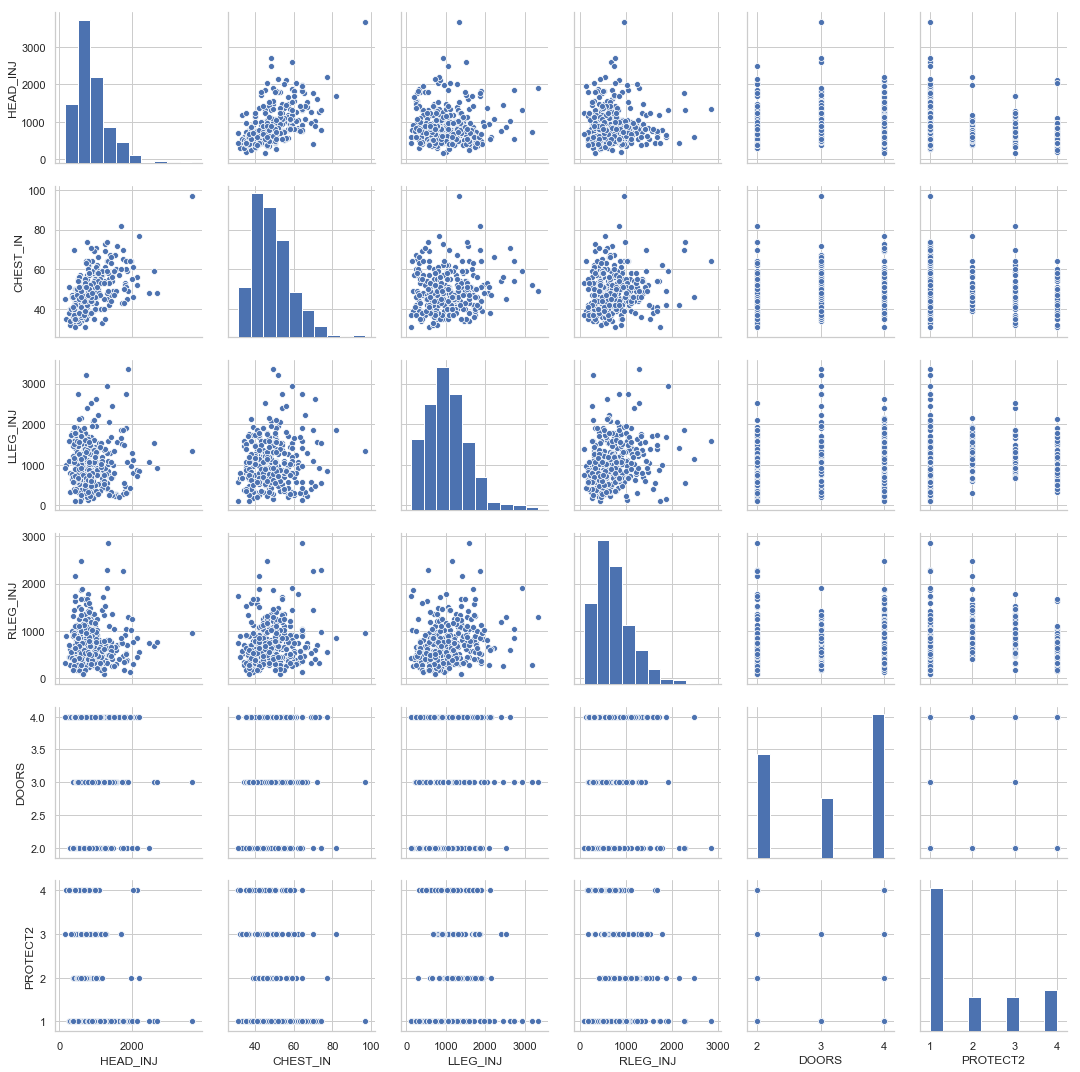

In [111]:
sns.pairplot(df[['HEAD_INJ','CHEST_IN','LLEG_INJ','RLEG_INJ','DOORS','PROTECT2']]);

In [112]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [113]:
y,X = dmatrices('HEAD_INJ~intercept+CHEST_IN+LLEG_INJ+RLEG_INJ+DOORS+YEAR+WEIGHT+SIZE2+PROTECT2',df,return_type='dataframe')

In [114]:
vif = pd.DataFrame()
vif['vifFactor'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['features'] = X.columns

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1543: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [115]:
vif

,vifFactor,features
0,0.000000,Intercept
1,0.000000,intercept
2,1.208952,CHEST_IN
3,1.127882,LLEG_INJ
4,1.106492,RLEG_INJ
5,1.152675,DOORS
6,1.226245,YEAR
7,1.533091,WEIGHT
8,1.814198,SIZE2
9,1.495477,PROTECT2


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3124: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  'left=%s, right=%s') % (left, right))
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3124: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  'left=%s, right=%s') % (left, right))
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3124: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  'left=%s, right=%s') % (left, right))
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3124: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  'left=%s, right=%s') % (left, right))
C:\P

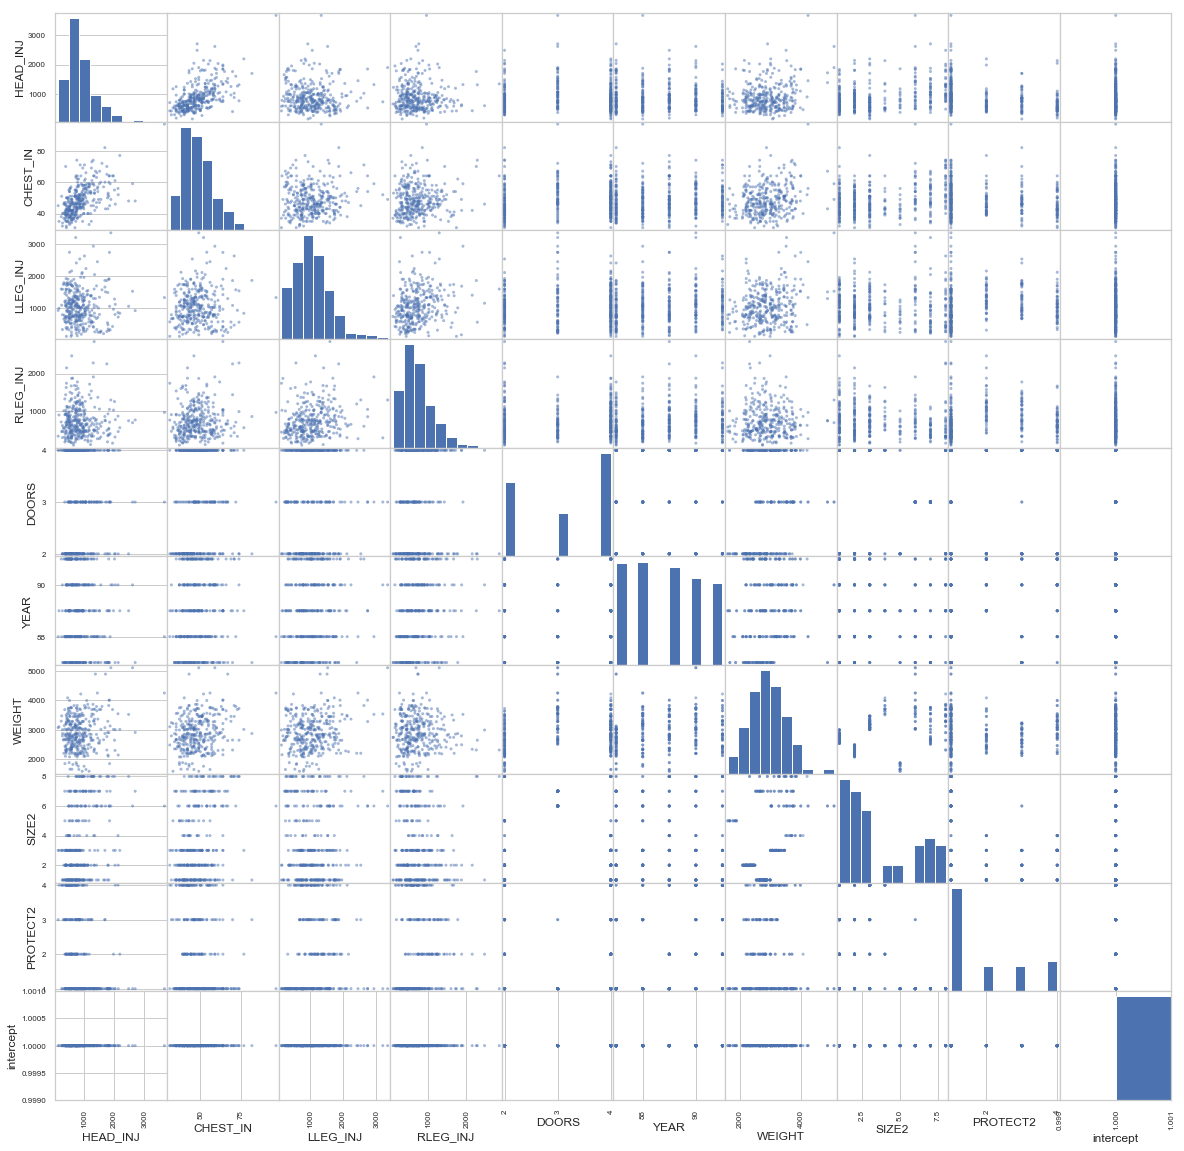

In [116]:
pd.plotting.scatter_matrix(df,figsize=(20,20));

# Questions

* Which company make had highest head injury count

* Which company make had lowest head injury count

* WHch year car make had the highest head injury

* WHch year car make had the lowest head injury

* TYpes of protection have influence on ehich type of injury

* whihc TYpes of protection have highest influence on head injury

* whihc TYpes of protection have least influence on head injury

* Significance of door on  various injury

* Significance of door on  head injury

* Driver had more injury or passenger (line graph plot of driver and passenger based on various factors)

* Over the years have the car make company have improved in safety measures or not. 

* Over the years have the car make company have improved in safety  of head injury measures or not. 

* Over the years have the injury safety improved ?

* Over the years have the head injury safety improved ? And which injury has declined?

* Does car size affect head injury or other inury?

* no. of cars model of a single company and thier saftey measure as improved over the year

* Does other injury help prevent other injury

* which company make is the safest

* which company model is the safest

* which year is the safest

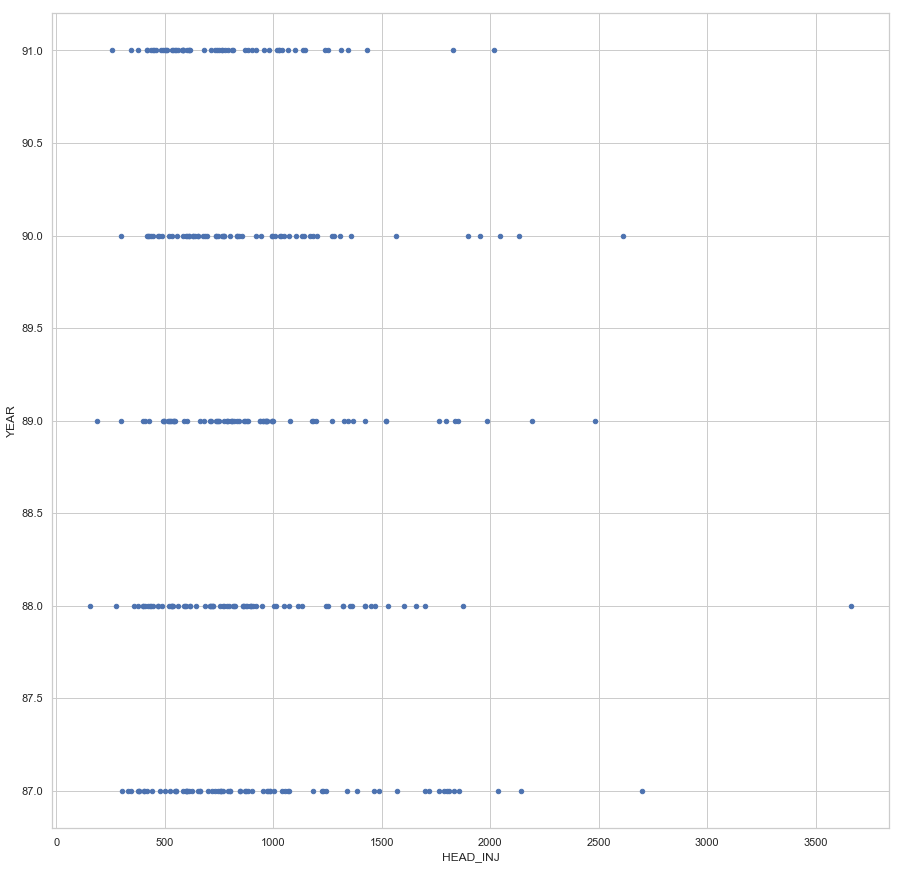

In [117]:
df.plot(kind='scatter',x='HEAD_INJ',y='YEAR',figsize=(15,15),grid=True)

In [118]:
# Which company make had highest head injury count
a = df.groupby(['MAKE'],as_index=False).sum()
m = (a["HEAD_INJ"].max())
a[a['HEAD_INJ']>=m]

,MAKE,HEAD_INJ,CHEST_IN,LLEG_INJ,RLEG_INJ,DOORS,YEAR,WEIGHT,SIZE2,PROTECT2,intercept
5,Chevrolet,41903,1980,51539,23507,116,3386,129905,171,72,38


In [119]:
# Which company make had lowest head injury count
a = df.groupby(['MAKE'],as_index=False).sum()
m = (a["HEAD_INJ"].min())
a[a['HEAD_INJ']<=m]

,MAKE,HEAD_INJ,CHEST_IN,LLEG_INJ,RLEG_INJ,DOORS,YEAR,WEIGHT,SIZE2,PROTECT2,intercept
4,Cadillac,423,39,541,1629,4,90,3500,4,4,1


In [120]:
# Which year car make had the highest head injury
a = df.groupby(['YEAR'],as_index=False).sum()
m = (a["HEAD_INJ"].max())
a[a['HEAD_INJ']>=m]

,YEAR,HEAD_INJ,CHEST_IN,LLEG_INJ,RLEG_INJ,DOORS,WEIGHT,SIZE2,PROTECT2,intercept
0,87,70044,3479,65088,46651,212,193924,245,115,73


In [121]:
# WHch year car make had the lowest head injury
a = df.groupby(['YEAR'],as_index=False).sum()
m = (a["HEAD_INJ"].min())
a[a['HEAD_INJ']<=m]

,YEAR,HEAD_INJ,CHEST_IN,LLEG_INJ,RLEG_INJ,DOORS,WEIGHT,SIZE2,PROTECT2,intercept
4,91,46416,2907,66819,46660,196,171189,181,155,59


In [122]:
# whihc TYpes of protection have highest influence on head injury
a = df.groupby(['PROTECT2'],as_index=False).sum()
m = (a["HEAD_INJ"].max())
a[a['HEAD_INJ']>=m]


,PROTECT2,HEAD_INJ,CHEST_IN,LLEG_INJ,RLEG_INJ,DOORS,YEAR,WEIGHT,SIZE2,intercept
0,1,197512,9495,181948,120332,582,16884,559452,885,191


In [123]:
# whihc TYpes of protection have least influence on head injury
a = df.groupby(['PROTECT2'],as_index=False).sum()
m = (a["HEAD_INJ"].min())
a[a['HEAD_INJ']<=m]


,PROTECT2,HEAD_INJ,CHEST_IN,LLEG_INJ,RLEG_INJ,DOORS,YEAR,WEIGHT,SIZE2,intercept
1,2,34358,2191,59704,49825,156,4141,128480,89,46


In [124]:
# TYpes of protection have influence on which type of injury


In [125]:
# Significance of doors on  head injury
a = df.groupby(['DOORS'],as_index=False).sum()
m = (a["HEAD_INJ"].max())
a[a['HEAD_INJ']>=m]

,DOORS,HEAD_INJ,CHEST_IN,LLEG_INJ,RLEG_INJ,YEAR,WEIGHT,SIZE2,PROTECT2,intercept
2,4,136752,7759,169763,123737,14087,462894,426,341,158


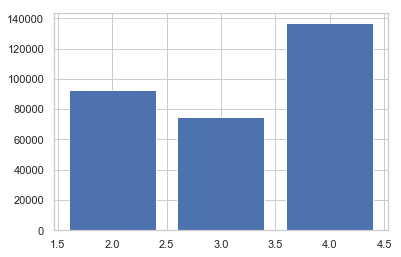

In [126]:
plt.bar(a['DOORS'],a['HEAD_INJ']);

In [127]:
# Significance of door on  various injury


In [128]:
# Driver had more injury or passenger (line graph plot of driver and passenger based on various factors)
a = df.groupby(['DRIV_PAS'],as_index=False).mean()
m = (a["HEAD_INJ"].max())
a

,DRIV_PAS,HEAD_INJ,CHEST_IN,LLEG_INJ,RLEG_INJ,DOORS,YEAR,WEIGHT,SIZE2,PROTECT2,intercept
0,Driver,973.298851,51.712644,1010.316092,801.867816,3.143678,88.919540,2913.109195,3.551724,1.919540,1.0
1,Passen,823.402439,45.140244,1108.743902,674.731707,3.115854,88.841463,2892.103659,3.554878,1.871951,1.0


In [129]:
df[['HEAD_INJ','CHEST_IN','LLEG_INJ','RLEG_INJ']].describe()

,HEAD_INJ,CHEST_IN,LLEG_INJ,RLEG_INJ
count,338.000000,338.000000,338.000000,338.000000
mean,900.568047,48.523669,1058.073964,740.180473
std,465.049823,9.556689,542.827741,424.225893
min,157.000000,31.000000,120.000000,89.000000
25%,583.000000,42.000000,691.750000,450.000000
50%,790.500000,47.000000,1012.500000,656.500000
75%,1069.500000,54.000000,1365.500000,943.500000
max,3665.000000,97.000000,3347.000000,2856.000000


* Max: 3665 (HEAD_INJ)
* Min: 31 (CHEST_INJ)

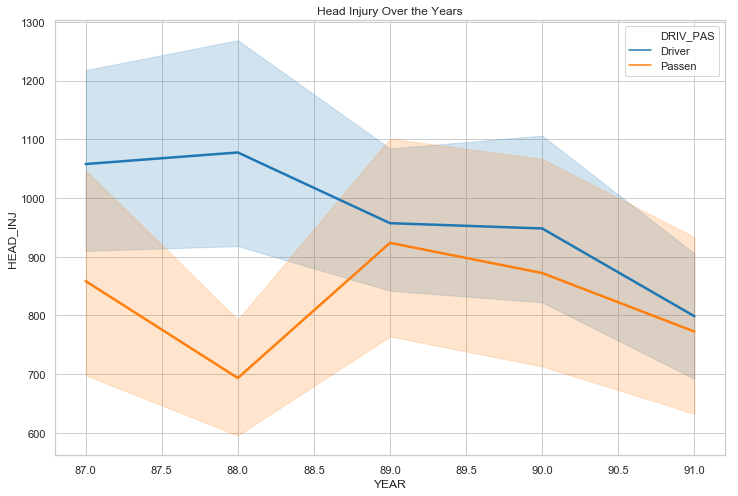

In [130]:
plt.figure(figsize=(12,8))
sns.lineplot(df['YEAR'],df['HEAD_INJ'],df['DRIV_PAS'],palette="tab10", linewidth=2.5).set_title('Head Injury Over the Years');

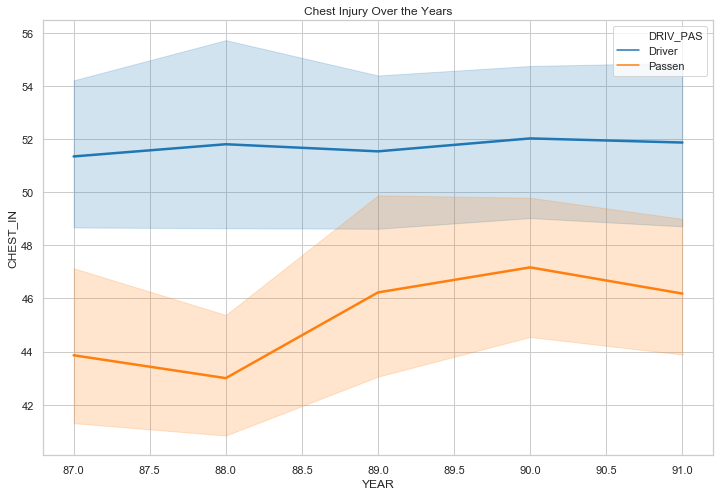

In [131]:
plt.figure(figsize=(12,8))
sns.lineplot(df['YEAR'],df['CHEST_IN'],df['DRIV_PAS'],palette="tab10", linewidth=2.5).set_title('Chest Injury Over the Years');

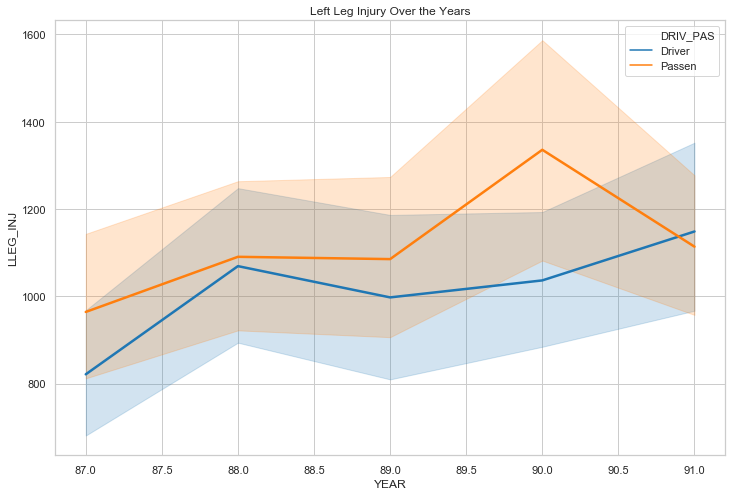

In [132]:
plt.figure(figsize=(12,8))
sns.lineplot(df['YEAR'],df['LLEG_INJ'],df['DRIV_PAS'],palette="tab10", linewidth=2.5).set_title('Left Leg Injury Over the Years');

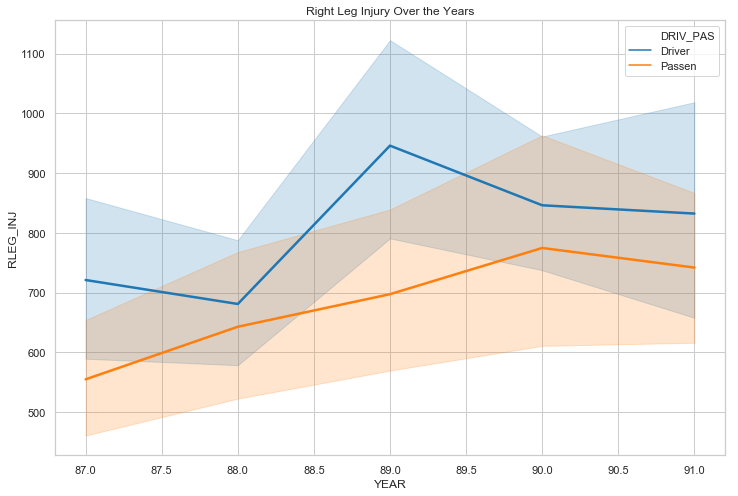

In [133]:
plt.figure(figsize=(12,8))
sns.lineplot(df['YEAR'],df['RLEG_INJ'],df['DRIV_PAS'],palette="tab10", linewidth=2.5).set_title('Right Leg Injury Over the Years');

In [134]:
# Over the years have the car make company have improved in safety measures or not. 


In [135]:
# Over the years have the car make company have improved in safety  of head injury measures or not. 



In [136]:
# Over the years have the injury safety improved ?


In [156]:
# Over the years have the head injury safety improved ? And which injury has declined?
plt.figure(figsize=(12,8))
sns.lineplot(df[['HEAD_INJ','CHEST_IN','LLEG_INJ','RLEG_INJ']],df['YEAR'],columns=['HEAD_INJ','CHEST_IN','LLEG_INJ','RLEG_INJ'],palette="tab10", linewidth=2.5).set_title('Injuries Over the Years');


ValueError: Shape of passed values is (6, 4), indices imply (6, 338)

<Figure size 864x576 with 0 Axes>

In [160]:
rs = np.random.RandomState(365)
values = rs.randn(365, 4).cumsum(axis=0)
dates = pd.date_range("1 1 2016", periods=365, freq="D")
data = pd.DataFrame(values, dates, columns=["A", "B", "C", "D"])
data = data.rolling(7).mean()
values

array([[  0.16792113,   0.52350518,   0.81737553,   1.70384552],
       [ -1.97902642,   1.23770369,   0.05723019,   2.74326736],
       [ -2.94547836,   1.09402466,   1.62835461,   2.35998788],
       ...,
       [-20.16215347,   9.46658006, -10.38886875,  17.95576784],
       [-20.32296367,   9.63655141,  -7.97732518,  19.39724181],
       [-20.76771621,  11.01141408,  -7.94147579,  19.35811172]])

In [ ]:
# Does car size affect head injury or other inury?


In [ ]:
# no. of cars model of a single company and thier saftey measure as improved over the year



In [ ]:
# Does other injury help prevent other injury



In [ ]:
# which company make is the safest



In [ ]:
# which company model is the safest


In [ ]:

# which year is the safest

# Modling

### Select model techniques

assumptions

### Generate test design

how much will be for testing

### Build model

set model parameters

### Asses model


# Evaluation

### Evaluate results

asses of data mining result w.r.t business criteria


### Approve Model

### Review process

### Determine next steps 


list of possible action